# 7. 머신러닝 프로세스

모델훈련과 세부튜닝

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

data = pd.read_csv('./../../data/bigboongi/Fvote.csv', encoding='utf-8')

In [3]:
X = data[data.columns[1:13]]
y = data[['vote']]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Grid Search(그리드 탐색)

그리드 탐색은 분석자가 하이퍼파라미터 특정값을 지정하고, 각각 모델에 적용해 모델 적합도를 비교하는 방법

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

정확도가 가장 높은 하이퍼파라미터(C)가 무엇인지는 'grid_search.best_params_'에 있음
이 때의 정확도는 'grid_search.best_score_'에 있음

In [9]:
print('Best Parameter: {}'.format(grid_search.best_params_))
print('Best Cross-validity Score: {:.3f}'.format(grid_search.best_score_))

Best Parameter: {'C': 10}
Best Cross-validity Score: 0.727


In [11]:
print('Test set Score: {:.3f}'.format(grid_search.score(X_test, y_test)))

Test set Score: 0.679


In [12]:
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002570,0.000980,0.000835,0.000155,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.001857,0.000306,0.000703,0.000184,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.002331,0.000063,0.000554,0.000047,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.003027,0.000162,0.000522,0.000055,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,...,0.714919,0.079466,4,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.003676,0.000315,0.000443,0.000015,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.004318,0.000389,0.000496,0.000037,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


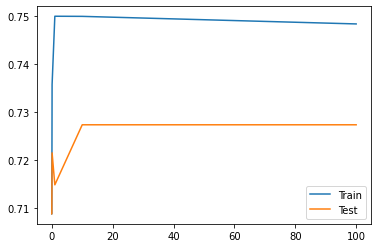

In [13]:
import matplotlib.pyplot as plt

plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label='Test')
plt.legend()

## 3. Random Search

랜덤 탐색은 범위를 정하고 그 안에서 무작위로 C값을 찾는 것이다.

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'C': randint(low=0.001, high=100)}

In [15]:
from sklearn.linear_model import LogisticRegression

In [18]:
random_search = RandomizedSearchCV(LogisticRegression(),
                                   param_distributions=param_distribs, cv=5,
                                   return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14676c820>},
                   return_train_score=True)

In [19]:
print('Best Parameter: {}'.format(random_search.best_params_))
print('Best Cross-validity Score: {:.3f}'.format(random_search.best_score_))

Best Parameter: {'C': 90}
Best Cross-validity Score: 0.727


In [20]:
print('Test set Score: {:.3f}'.format(random_search.score(X_test, y_test)))

Test set Score: 0.679


In [21]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006137,0.001144,0.000808,0.000132,90,{'C': 90},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.004300,0.000509,0.000603,0.000098,8,{'C': 8},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
2,0.004294,0.000272,0.000581,0.000097,37,{'C': 37},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
3,0.004244,0.000129,0.000538,0.000141,53,{'C': 53},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.003916,0.000252,0.000470,0.000099,43,{'C': 43},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
5,0.004077,0.000374,0.000493,0.000075,55,{'C': 55},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
6,0.004059,0.000382,0.000425,0.000024,91,{'C': 91},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
7,0.003809,0.000357,0.000446,0.000058,29,{'C': 29},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
8,0.003883,0.000439,0.000466,0.000066,25,{'C': 25},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
9,0.003923,0.000349,0.000471,0.000105,67,{'C': 67},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


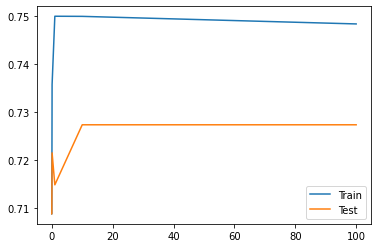

In [22]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label='Test')
plt.legend()